# Modos normales de oscilación: sistema de dos grados de libertad
Víctor A. Bettachini  
bettachini@df.uba.ar  
Copyright Departamento de Física, Facultad de Ciencias Exactas y Naturales, Universidad de Buenos Aires

# Enunciado
 Considere el sistema de la figura en ausencia de gravedad
<!---
<figure>
<left>
<img src='./modosNormales_ej1-6.png', width="150">
</figure>
--->

![Figura 1: Sistema a analizar.](modosNormales_ej1-6.png)
    
a) Obtenga sus frecuencias naturales de oscilación y los modos normales correspondientes.
Escriba las ecuaciones de movimiento de cada masa.  
b) Sabiendo que a $t=0$ el sistema satisface las siguientes condiciones: $\Psi_{a}(0)=1,\,\Psi_{b}(0)=0$ y que se encuentra en reposo, encuentre el movimiento de cada partícula.   
c) Analice cómo se modifica el resultado por la presencia de la gravedad.

In [22]:
import sympy as sy
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting()
psia, psib, xi1, xi2 = sy.physics.mechanics.dynamicsymbols(
    'psi_a psi_b xi_1 xi_2')
xi1a, xi1b, xi2a, xi2b = sy.physics.mechanics.dynamicsymbols(
    'xi_{1a} xi_{1b} xi_{2a} xi_{2b}')
g, m, k, l0, t, phi1, phi2, A1, A2, l2 = sy.symbols(
    'g m k l_0 t phi_1 phi_2 A_1 A2 l_2')
omega, omega1, omega2 = sy.symbols('omega omega_1 omega_2', positive=True, real= True)

# Sistema sin gravedad: 1) obtención de frecuencias y modos normales de oscilación

## Potenciales en el sistema
Empezamos preguntandonos que potenciales están en juego.
En este caso los de los resortes.
En la figura está indicada como coordenadas sugeridas las $\psi_i$, notación que se usa para notar un pequeño desplazamiento.
Pero antes de ver el porqué de esta sugerencia hagamos el análisis el potencial elástico de cada resorte que como sabemos depende de la longitud de los mismos.

Tomamos el origen del sistema de coordenadas en el "techo" del que pende el resorte superior, de allí apuntando hacia abajo orientamos $\hat{y}$.
Para el resorte unido a este techo la posición de la masa superior $\vec{y}_a$ determina su longitud
$$
l_1 = |y_a \hat{y} - 0|= y_a .
$$
Para el que pende debajo de esta masa tiene en su otro extremo en $\vec{y}_b$ otra masa.
La posición de ambas establece su longitud
$$
l_2 = |y_b \hat{y} - y_a \hat{y}|= y_b- y_a . 
$$
Si ambos tienen la misma longitud natural $l_0$, aquella que tendrían si ninguna fuerza se aplicara a ellos, el potencial del sistema es
$$
V(y_a, y_b)= \frac{k}{2} \left[ \left(y_a - l_0 \right)^2 + \left(y_b - y_a - l_0 \right)^2 \right].
$$ 

## Fuerzas y planteo de 2.a ley de Newton
Para escribir la 2.a ley de Newton para cada masa obtenemos las fuerzas sobre ellas.
Para la superior
$$
m \ddot{y}_a = m \ddot{\vec{y}_a} \cdot \hat{y} = -\vec{\nabla}_a V \cdot \hat{y} = - \frac{\partial}{\partial y_a} V(y_a, y_b) = - k (y_a- l_0) + k (y_b -y_a- l_0) .
$$
Para la masa inferior lo mismo
$$
\frac{2m}{3} \ddot{y}_b = \frac{2m}{3} \ddot{\vec{y}_b} \cdot \hat{y} = -\vec{\nabla}_b V \cdot \hat{y} = - \frac{\partial}{\partial y_b} V(y_a, y_b)= - k (y_b -y_a- l_0) .
$$

En este sistema no afectado por la aceleración $\vec{g}$, resulta que las longitudes de equilibrio de las fuerzas corresponden a cuando la longitud de los resortes coincide con $l_0$, pues ninguna otra fuerza que la elástica existe en este modelo.
Esto es fácilmente comprobable obteniendo el mínimo de potencial en función de las longitudes de los resortes. $l_1$ y $l_2$.
Entonces
$$
y_a = l_o + \psi_a,
$$
siendo $\psi_a$ el pequeño desplazamiento en torno a la posición de equilibrio, y lo mismo para el extremo inferior del segundo resorte.
$$
y_b = 2 l_o + \psi_b.
$$

Si quiero re-escribir las ecuaciones de la 2.a ley en funcion de estos pequeños desplazamientos al derivar dos veces respecto al tiempo $\ddot{y}_a= \ddot{\psi}_a$ y $\ddot{y}_b = \ddot{\psi}_b$ por lo que obtenemos
$$
\begin{aligned}
m \ddot{\psi}_a & = - k \left[ (l_o + \psi_a) - l_0 \right] + k \left[ (2 l_0 + \psi_b) - (l_0 + \psi_a) - l_0 \right] = -k \psi_a + k (\psi_b - \psi_a) = -k (2\psi_a - \psi_b) \\
\frac{2m}{3} \ddot{\psi}_b & = -  k \left( (2 l_o+ \psi_b) - (l_o + \psi_a) - l_0 \right)= -k (\psi_b - \psi_a)
\end{aligned}
$$
Nos queda un sistema de ecuaciones acopladas
$$
\left \{
\begin{matrix}
\ddot{\psi}_a = - \frac{k}{m} (2 \psi_a - \psi_b)\\
\ddot{\psi}_b = -\frac{3k}{2m} ( \psi_b - \psi_a)
\end{matrix}
\right .
,
$$
que puede escribirse en forma matricial

In [2]:
vecPsi = sy.Matrix([[psia],[psib]])
matV = sy.Matrix([[2, -1],['-3/2','3/2']])
sy.Eq(sy.MatMul(vecPsi.diff().diff()), sy.MatMul(-k/m, matV, vecPsi))

⎡ψₐ̈ ⎤   -k  ⎡ 2    -1 ⎤ ⎡ψₐ ⎤
⎢   ⎥ = ───⋅⎢         ⎥⋅⎢   ⎥
⎣ψ_̈b⎦    m  ⎣-3/2  3/2⎦ ⎣ψ_b⎦

## Resolución del sistema de ecuaciones diferenciales
Proponiendo la solución $\psi= \psi_0 \mathrm{e}^{i \omega t+ \varphi}$, se llega a que $\ddot{\psi} =  (-i \omega)^2 \psi= - \omega^2 \psi$ lo que permite escribir el sistema como

In [3]:
sy.Eq(sy.MatMul(- omega**2, vecPsi), sy.MatMul(-k/m, matV, vecPsi))

  2 ⎡ψₐ ⎤   -k  ⎡ 2    -1 ⎤ ⎡ψₐ ⎤
-ω ⋅⎢   ⎥ = ───⋅⎢         ⎥⋅⎢   ⎥
    ⎣ψ_b⎦    m  ⎣-3/2  3/2⎦ ⎣ψ_b⎦

Esto nos permite agrupar todo a un lado del signo de igualdad

In [4]:
systeme = omega**2* sy.eye(2)+ sy.MatMul(-(k/m), matV)
sy.Eq(sy.MatMul(systeme, vecPsi),0,evaluate=False)

⎡  2⋅k    2      k     ⎤          
⎢- ─── + ω       ─     ⎥          
⎢   m            m     ⎥ ⎡ψₐ ⎤    
⎢                      ⎥⋅⎢   ⎥ = 0
⎢   3⋅k        3⋅k    2⎥ ⎣ψ_b⎦    
⎢   ───      - ─── + ω ⎥          
⎣   2⋅m        2⋅m     ⎦          

Para evitar la solución trivial $\psi_1= \psi_2= 0$ el determinante de la matriz debe ser nulo.
Se obtiene así un polinomio característico,

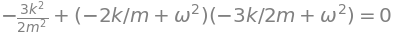

In [5]:
detSysteme = sy.det(systeme)
sy.Eq(detSysteme,0,evaluate=False)

De las raices se obtienen las $\omega$ de los modos normales

In [6]:
frecModos = sy.solve(detSysteme,omega)
frecModos

Las $\omega$ negativas no tienen sentido físico, por lo que nos quedamos con las dos correspondientes a este sistema de sendos grados de libertad:

In [7]:
omega_1 = sy.simplify(frecModos[3])
omega_2 = sy.simplify(frecModos[1]) 
sy.Eq(omega1,omega_1), sy.Eq(omega2,omega_2)

## Modos normales
Con cada una de las $\omega$ obtenidas da una solución válida al sistema de ecuaciones diferenciales del estilo que obtuvimos para el oscilador de un solo grado de libertad.
Pero con dos grados de libertad habrá que definir la relación de amplitudes entre cada uno de estos, lo que escribiremos como un vector $\vec{\xi}_i$.

### Modo para $\omega_1$
Para $\omega_1$ corresponderá una relación de amplitudes para cada masa

In [8]:
vecXi1 = sy.Matrix([[xi1a],[xi1b]])
vecXi1

⎡ξ_{1a}⎤
⎢      ⎥
⎣ξ_{1b}⎦

y una fase $\phi_1$.

In [9]:
sy.Eq(sy.MatMul(vecPsi),xi1* sy.cos(omega1*t+ phi1), evaluate=False)

⎡ψₐ ⎤                    
⎢   ⎥ = ξ₁⋅cos(ω₁⋅t + φ₁)
⎣ψ_b⎦                    

¿Como obtener este vector $\vec{\xi}_1$?
Si reemplazamos esta solución en

In [10]:
sy.Eq(sy.MatMul(systeme, vecPsi),0,evaluate=False)

⎡  2⋅k    2      k     ⎤          
⎢- ─── + ω       ─     ⎥          
⎢   m            m     ⎥ ⎡ψₐ ⎤    
⎢                      ⎥⋅⎢   ⎥ = 0
⎢   3⋅k        3⋅k    2⎥ ⎣ψ_b⎦    
⎢   ───      - ─── + ω ⎥          
⎣   2⋅m        2⋅m     ⎦          

In [11]:
sy.Eq(sy.MatMul(systeme.subs(omega,omega1), xi1, sy.cos(omega1* t+ phi1)),0,evaluate=False)

⎡  2⋅k     2       k     ⎤                      
⎢- ─── + ω₁        ─     ⎥                      
⎢   m              m     ⎥                      
⎢                        ⎥⋅ξ₁⋅cos(ω₁⋅t + φ₁) = 0
⎢    3⋅k        3⋅k     2⎥                      
⎢    ───      - ─── + ω₁ ⎥                      
⎣    2⋅m        2⋅m      ⎦                      

Ya que el coseno no debe ser nulo en todo $t$ nos encontramos que reemplazando por el valor de $\omega_1$

In [12]:
sysXi1= sy.Eq(sy.MatMul(systeme.subs(omega,omega_1), vecXi1),0,evaluate=False)
sysXi1

⎡ k    k ⎤             
⎢ ─    ─ ⎥             
⎢ m    m ⎥ ⎡ξ_{1a}⎤    
⎢        ⎥⋅⎢      ⎥ = 0
⎢3⋅k  3⋅k⎥ ⎣ξ_{1b}⎦    
⎢───  ───⎥             
⎣2⋅m  2⋅m⎦             

Despejando de la primera o segunda ecuación nos queda idéntica relación, $\xi_{1b}= - \xi_{1a}$, con lo que obtuvimos

In [13]:
vecXi1subs= vecXi1.subs([(xi1a,1),(xi1b,-1) ])
sy.Eq(vecXi1,vecXi1subs)

⎡ξ_{1a}⎤   ⎡1 ⎤
⎢      ⎥ = ⎢  ⎥
⎣ξ_{1b}⎦   ⎣-1⎦

Si el sistema oscilara con $\omega= \omega_1$ cuando una masa sube la otra baja y visceversa con ídentica separacion de su posición de equilibrio.

### Modo para $\omega_2$
Seguimos el mismo procedimento para $\omega_2$

In [14]:
sy.Eq(sy.MatMul(systeme.subs(omega,omega2), xi2, sy.cos(omega2* t+ phi2)),0,evaluate=False)

⎡  2⋅k     2       k     ⎤                      
⎢- ─── + ω₂        ─     ⎥                      
⎢   m              m     ⎥                      
⎢                        ⎥⋅ξ₂⋅cos(ω₂⋅t + φ₂) = 0
⎢    3⋅k        3⋅k     2⎥                      
⎢    ───      - ─── + ω₂ ⎥                      
⎣    2⋅m        2⋅m      ⎦                      

In [15]:
vecXi2 = sy.Matrix([[xi2a],[xi2b]])
sysXi2= sy.Eq(sy.MatMul(systeme.subs(omega,omega_2), vecXi2),0,evaluate=False)
sysXi2

⎡-3⋅k    k ⎤             
⎢─────   ─ ⎥             
⎢ 2⋅m    m ⎥ ⎡ξ_{2a}⎤    
⎢          ⎥⋅⎢      ⎥ = 0
⎢ 3⋅k   -k ⎥ ⎣ξ_{2b}⎦    
⎢ ───   ───⎥             
⎣ 2⋅m    m ⎦             

Despejando de la primera o segunda ecuación nos queda idéntica relación, $\xi_{2b}= \frac{3}{2} \xi_{2a}$, por tanto

In [16]:
vecXi2subs= vecXi2.subs([(xi2a,1),(xi2b,'3/2') ])
sy.Eq(vecXi2,vecXi2subs)

⎡ξ_{2a}⎤   ⎡ 1 ⎤
⎢      ⎥ = ⎢   ⎥
⎣ξ_{2b}⎦   ⎣3/2⎦

Si el sistema oscilará con $\omega= \omega_2$ ambas masas subirían o bajarían, solo que la de más abajo se distanciaría de su posición de equilibrio 3/2 veces más que la de arriba.

### Solución general
Sabemos que la solución al sistema es la combinación lineal de ambas soluciones
$$
\begin{aligned}
  \begin{pmatrix}
   \psi_1\\
   \psi_2
  \end{pmatrix}
  = &
  A_1 \vec{\xi}_1 \cos{\left(\omega_1 t + \phi_1 \right)}+
  A_2 \vec{\xi}_2 \cos{\left(\omega_2 t + \phi_2 \right)} ,
\end{aligned}
$$
con $A_i$ y $\phi_i$ las amplitudes y fases de cada modo que deben responder a las condiciones iniciales.

In [17]:
dyn = A1* vecXi1subs* sy.cos(omega_1* t + phi1) + A2* vecXi2subs* sy.cos(omega_2* t + phi2)
sy.Eq(vecPsi,dyn)

        ⎡       ⎛              ___⎞                             ⎤
        ⎢       ⎜             ╱ k ⎟                             ⎥
        ⎢       ⎜     √2⋅t⋅  ╱  ─ ⎟         ⎛              ___⎞ ⎥
        ⎢       ⎜          ╲╱   m ⎟         ⎜             ╱ k ⎟ ⎥
        ⎢ A₂⋅cos⎜φ₂ + ────────────⎟ + A₁⋅cos⎜φ₁ + √3⋅t⋅  ╱  ─ ⎟ ⎥
        ⎢       ⎝          2      ⎠         ⎝          ╲╱   m ⎠ ⎥
⎡ψₐ ⎤   ⎢                                                       ⎥
⎢   ⎥ = ⎢        ⎛              ___⎞                            ⎥
⎣ψ_b⎦   ⎢        ⎜             ╱ k ⎟                            ⎥
        ⎢        ⎜     √2⋅t⋅  ╱  ─ ⎟                            ⎥
        ⎢        ⎜          ╲╱   m ⎟                            ⎥
        ⎢3⋅A₂⋅cos⎜φ₂ + ────────────⎟         ⎛              ___⎞⎥
        ⎢        ⎝          2      ⎠         ⎜             ╱ k ⎟⎥
        ⎢─────────────────────────── - A₁⋅cos⎜φ₁ + √3⋅t⋅  ╱  ─ ⎟⎥
        ⎣             2                      ⎝          ╲╱   m ⎠⎦

## b) Condiciones iniciales
Segun el enunciado en $t=0$,  $\psi_{a}(0)=1,\,\psi_{b}(0)=0$

In [18]:
dynSubs= dyn.subs(t,0)
vecPsiSubs= vecPsi.subs([(psia,1),(psib,0)])
sy.Eq(vecPsiSubs,dynSubs)

      ⎡ A₂⋅cos(φ₂) + A₁⋅cos(φ₁) ⎤
⎡1⎤   ⎢                         ⎥
⎢ ⎥ = ⎢3⋅A₂⋅cos(φ₂)             ⎥
⎣0⎦   ⎢──────────── - A₁⋅cos(φ₁)⎥
      ⎣     2                   ⎦

No parece alcanzar con esto para definir cuatro variables.
El enunciado nos da otra información al decir "que se encuetra en reposo", esto significa que las velocidades inciales son nulas $\dot{\psi}_{a}(0)= 0,\,\dot{\psi}_{b}(0)=0$.
Uno estaría tentado de hacer lo mismo que con las condiciones sobre la posición.

In [19]:
dynSubsDiff= dyn.diff(t).subs(t,0)
vecPsiSubsDiff= vecPsi.subs([(psia,0),(psib,0)])
sy.Eq(vecPsiSubsDiff,dynSubsDiff)

      ⎡             ___                                 ⎤
      ⎢            ╱ k                                  ⎥
      ⎢   √2⋅A₂⋅  ╱  ─ ⋅sin(φ₂)             ___         ⎥
      ⎢         ╲╱   m                     ╱ k          ⎥
      ⎢ - ───────────────────── - √3⋅A₁⋅  ╱  ─ ⋅sin(φ₁) ⎥
⎡0⎤   ⎢             2                   ╲╱   m          ⎥
⎢ ⎥ = ⎢                                                 ⎥
⎣0⎦   ⎢              ___                                ⎥
      ⎢             ╱ k                                 ⎥
      ⎢  3⋅√2⋅A₂⋅  ╱  ─ ⋅sin(φ₂)             ___        ⎥
      ⎢          ╲╱   m                     ╱ k         ⎥
      ⎢- ─────────────────────── + √3⋅A₁⋅  ╱  ─ ⋅sin(φ₁)⎥
      ⎣             4                    ╲╱   m         ⎦

Pero es bastante más sencillo de lo que parece.
Si establecemos $\phi_1= \phi_2=0$ esto nos asegura que las velocidades son nulas.

Volvemos entonces a las condiciones sobre la posición con este dato.

In [20]:
condA= sy.Eq(vecPsiSubs,dynSubs.subs([(phi1,0),(phi2,0)]))
condA

      ⎡ A₂ + A₁ ⎤
⎡1⎤   ⎢         ⎥
⎢ ⎥ = ⎢3⋅A₂     ⎥
⎣0⎦   ⎢──── - A₁⎥
      ⎣ 2       ⎦

No es difícil obtener que $A_1= \frac{3}{5}$ y $A_2=\frac{2}{5}$.
Con lo que finalmente obtenemos una solución para estas condiciones iniciales:

In [21]:
dyn = A1* vecXi1subs* sy.cos(omega_1* t + phi1) + A2* vecXi2subs* sy.cos(omega_2* t + phi2)
sy.Eq(vecPsi,dyn.subs([(A1,'3/5'), (A2,'3/5'), (phi1,0), (phi2,0)]))

        ⎡     ⎛         ___⎞                      ⎤
        ⎢     ⎜        ╱ k ⎟                      ⎥
        ⎢     ⎜√2⋅t⋅  ╱  ─ ⎟        ⎛         ___⎞⎥
        ⎢     ⎜     ╲╱   m ⎟        ⎜        ╱ k ⎟⎥
        ⎢3⋅cos⎜────────────⎟   3⋅cos⎜√3⋅t⋅  ╱  ─ ⎟⎥
        ⎢     ⎝     2      ⎠        ⎝     ╲╱   m ⎠⎥
        ⎢─────────────────── + ───────────────────⎥
⎡ψₐ ⎤   ⎢         5                     5         ⎥
⎢   ⎥ = ⎢                                         ⎥
⎣ψ_b⎦   ⎢     ⎛         ___⎞                      ⎥
        ⎢     ⎜        ╱ k ⎟                      ⎥
        ⎢     ⎜√2⋅t⋅  ╱  ─ ⎟        ⎛         ___⎞⎥
        ⎢     ⎜     ╲╱   m ⎟        ⎜        ╱ k ⎟⎥
        ⎢9⋅cos⎜────────────⎟   3⋅cos⎜√3⋅t⋅  ╱  ─ ⎟⎥
        ⎢     ⎝     2      ⎠        ⎝     ╲╱   m ⎠⎥
        ⎢─────────────────── - ───────────────────⎥
        ⎣         10                    5         ⎦

## c) ¿Qué modifica la presencia de gravedad?
Sin tratar de ser perspicaces empecemos a resolver "mecánicamente".
Al potencial anteriormente calculado agregamos el potencial gravitatorio
$$
V(y_a, y_b)= \frac{k}{2} \left[ \left(y_a - l_0 \right)^2 + \left(y_b - y_a - l_0 \right)^2 \right]- g( m_a y_a + m_b y_b) .
$$ 

Habrá nuevas posiciones de equilibrio.
Basta realizar $\frac{\partial}{\partial y_i} V = 0$ 
$$
\left\{
\begin{aligned}
k(y_a - l_0)- k (y_b - y_a - l_0)- g m_a =  2 k y_a - k y_b - g m_a &= 0 \\
k(y_b - y_a - l_0) - g m_b &= 0
\end{aligned}
\right.
$$
de donde puede obtenerse fácilmente las posiciones de equilibrio $y_{a0}= \frac{g}{k} (m_a + m_b) + l_0$ e $y_{a0}= \frac{g}{k} (m_a + 2 m_b) + 2 l_0$.

Bien, tenemos nuevas posiciones de equilibrio, y entonces para escribir en función de los apartamientos de estas $\psi_a$ y $\psi_b$ tenemos  
$$
\begin{aligned}
y_a &= y_{a0}+ \psi_a = \frac{g}{k} (m_a + m_b) + l_0 + \psi_a \\
y_b &= y_{b0}+ \psi_a = \frac{g}{k} (m_a + 2 m_b) + 2 l_0 + \psi_b,
\end{aligned}
$$

¿Qué seguía? Para obtener las fuerzas derivar el potencial potencial... ¡pero si lo acabamos de hacer!
Si reemplazo estos $y_a$ y $y_b$
$$
\left\{
\begin{aligned}
m_a \ddot{\psi}_a 
& = 2 k \left[ \frac{g}{k} (m_a + m_b) + l_0 + \psi_a \right] - k \left[ \frac{g}{k} (m_a + 2 m_b) + 2 l_0 + \psi_b \right] - g m_a \\
& = 2 g (m_a+ m_b) + 2k l_0 + 2 k \psi_a - g (m_a + 2 m_b) - 2 k l_0 - k \psi_b - g m_a \\
& = -k (2\psi_a - \psi_b) \\
m_b \ddot{\psi}_b 
& = k \left[ \left( \frac{g}{k} (m_a + 2 m_b) + 2 l_0 + \psi_b \right) - \left( \frac{g}{k} (m_a + m_b) + l_0 + \psi_a \right) - l_0 \right] - g m_b \\
& = g (m_a + 2 m_b) + 2 k l_0 + k \psi_b - g (m_a + m_b) + k l_0 + k \psi_a - kl_0 - g m_b \\
& = -k (\psi_b - \psi_a)
\end{aligned}
\right.
$$

Exactamente lo que teníamos para el caso sin gravedad.
¿Qué es lo que cambia?
No hay que olvidar de que si se quiere expresar las posiciones no desde el equilibrio sino como $y_i$ hay que sumar la posición de equilibrio, que ahora es mayor en módulo que las de los resortes libres, $l_0$ y $2l_0$ respectivamente.

Siendo perspicaces tendríamos que haber recordado que nada de lo que obtuvimos, en particular las frecuencias de oscilación, tenían dependencia en las longitudes de los resortes, si de $k$ y las $m$. 